In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [46]:
dados = pd.read_csv('dadosacoes.csv')

In [47]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


C:\Users\dsadm\AppData\Local\Temp\ipykernel_1528\2259240518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nome ação', y='preço ação R$', data=dados,


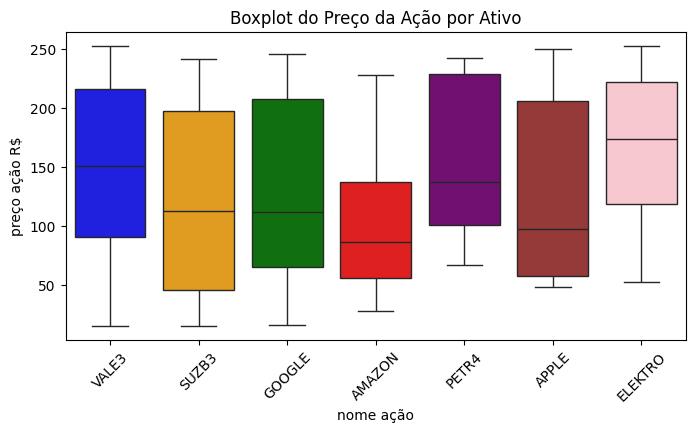

C:\Users\dsadm\AppData\Local\Temp\ipykernel_1528\2259240518.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=dados,


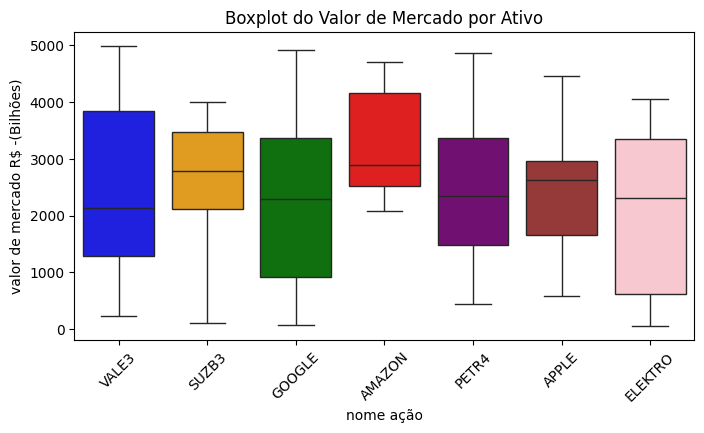

In [48]:
# Boxplot preços das ações de cada ativo
plt.figure(figsize=(8, 4))
sns.boxplot(x='nome ação', y='preço ação R$', data=dados, 
            palette=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
plt.title('Boxplot do Preço da Ação por Ativo')
plt.xticks(rotation=45)
plt.show()

# Boxplot do valor de mercado para cada ativo
plt.figure(figsize=(8, 4))
sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=dados,
          palette=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])

plt.title('Boxplot do Valor de Mercado por Ativo')
plt.xticks(rotation=45)
plt.show()

In [49]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [50]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [51]:
# Substituir valores ausentes pelas médias das colunas
# Preenchemos valores faltantes em 'preço ação R$' com a média dos preços das ações
dados['preço ação R$'].fillna(dados['preço ação R$'].mean(), inplace=True)

# Preenchemos valores ausentes em 'qtde cotas' com a média da quantidade de cotas
dados['qtde cotas'].fillna(dados['qtde cotas'].mean(), inplace=True)

# Preenchemos valores ausentes em 'valor de mercado R$ -(Bilhões)' com a média do valor de mercado
dados['valor de mercado R$ -(Bilhões)'].fillna(dados['valor de mercado R$ -(Bilhões)'].mean(), inplace=True)

# Verificar se ainda existem valores ausentes nas colunas após o preenchimento
dados.isnull().sum()


nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [52]:
# Codificar variáveis categóricas: Convertendo a coluna 'nome ação' para variáveis binárias (dummy variables)
# A função pd.get_dummies cria uma coluna para cada categoria presente na coluna 'nome ação', substituindo os valores por 1 (presente) ou 0 (ausente).
# O parâmetro 'drop_first=True' evita a multicolinearidade, excluindo a primeira coluna gerada.
dados = pd.get_dummies(dados, columns=['nome ação'], drop_first=True)

# Exibindo as primeiras linhas do DataFrame para verificar as alterações realizadas
dados.head()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [53]:
# Selecionando apenas as colunas numéricas para normalização
dados_numericos = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Normalizando os dados com StandardScaler
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)

# Convertendo os dados normalizados de volta para DataFrame
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados_numericos.columns)

# Verificando os dados normalizados
dados_normalizados.head()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,0.772901,-0.256419,-0.215567
1,-0.602986,0.694636,0.456955
2,0.385515,-0.402735,0.274259
3,-1.070520,-0.658788,0.848240
4,1.013347,-1.573264,0.389343


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


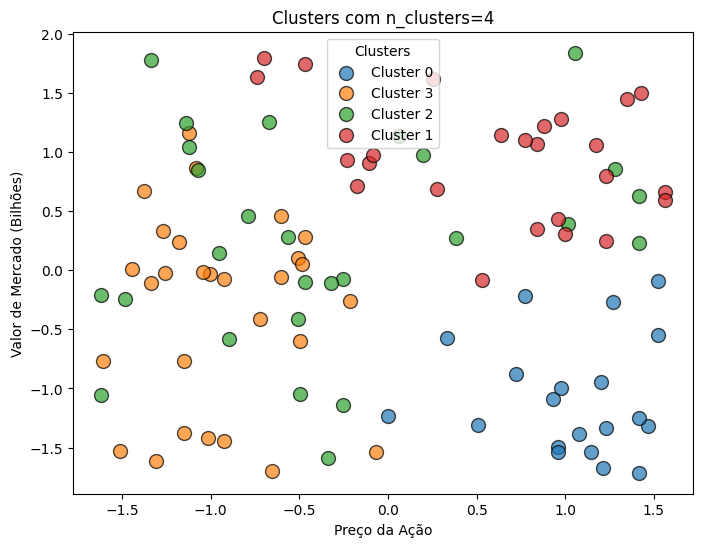

In [54]:
# K-means com n_clusters=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
dados_normalizados['Cluster_4'] = kmeans_4.fit_predict(dados_normalizados)

# Visualizando os clusters formados
plt.figure(figsize=(8, 6))

# Atribuindo cores diferentes para cada cluster usando a paleta tab10
for i, cluster in enumerate(dados_normalizados['Cluster_4'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_4'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Clusters com n_clusters=4')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


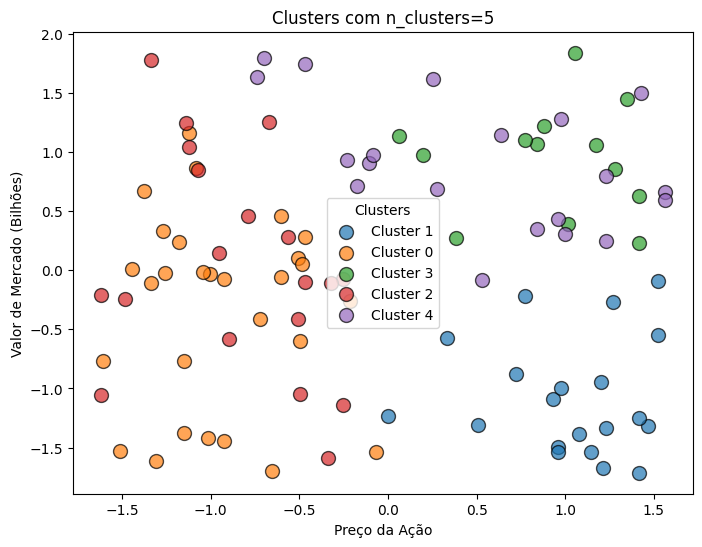

In [55]:
# a) Alterar para 5 clusters e verificar os grupos formados
# K-means com n_clusters=5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
dados_normalizados['Cluster_5'] = kmeans_5.fit_predict(dados_normalizados)

# Visualizando os clusters
plt.figure(figsize=(8, 6))

# Atribuindo cores aos clusters com a paleta 'tab10'
for i, cluster in enumerate(dados_normalizados['Cluster_5'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_5'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Clusters com n_clusters=5')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


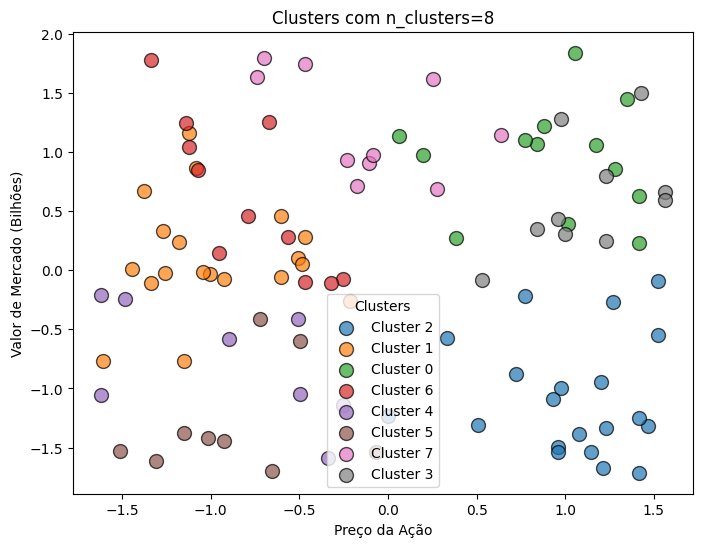

In [56]:
# b) Alterar para 8 clusters e verificar os grupos formados
# K-means com n_clusters=8
kmeans_8 = KMeans(n_clusters=8, random_state=42)
dados_normalizados['Cluster_8'] = kmeans_8.fit_predict(dados_normalizados)

# Visualizando os clusters
plt.figure(figsize=(8, 6))

# Atribuindo cores aos clusters com a paleta 'tab10'
for i, cluster in enumerate(dados_normalizados['Cluster_8'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_8'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Clusters com n_clusters=8')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

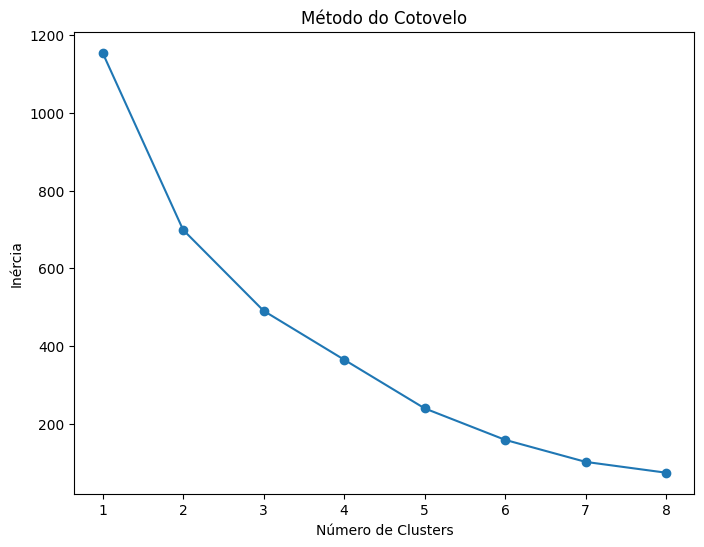

In [57]:
# c) Plotar o gráfico do cotovelo para n variando de 1 a 8 clusters
# Método do Cotovelo para encontrar o número ideal de clusters
inertia = []
for n in range(1, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(dados_normalizados)
    inertia.append(kmeans.inertia_)

# Exibindo o gráfico
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

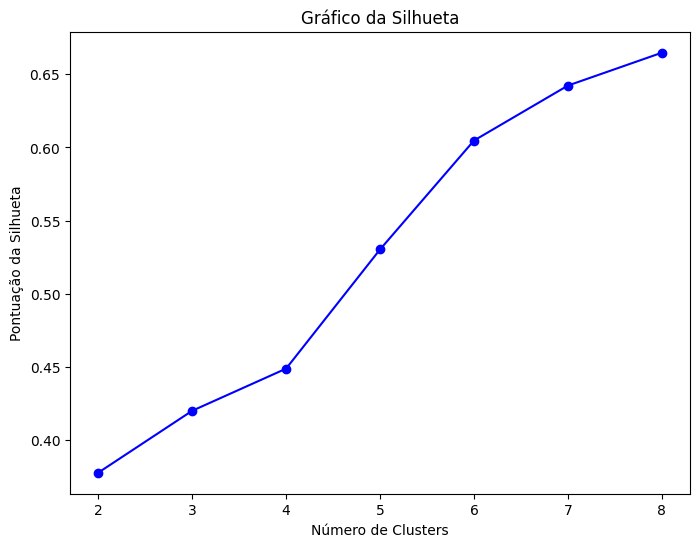

In [58]:
# d) Plotar o gráfico da silhueta
# Calculando a pontuação da silhueta para diferentes números de clusters
silhouette_scores = []
for n in range(2, 9):  # A silhueta não é definida para 1 cluster
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(dados_normalizados)
    silhouette_avg = silhouette_score(dados_normalizados, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Exibindo o gráfico da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o', color='b')
plt.title('Gráfico da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()


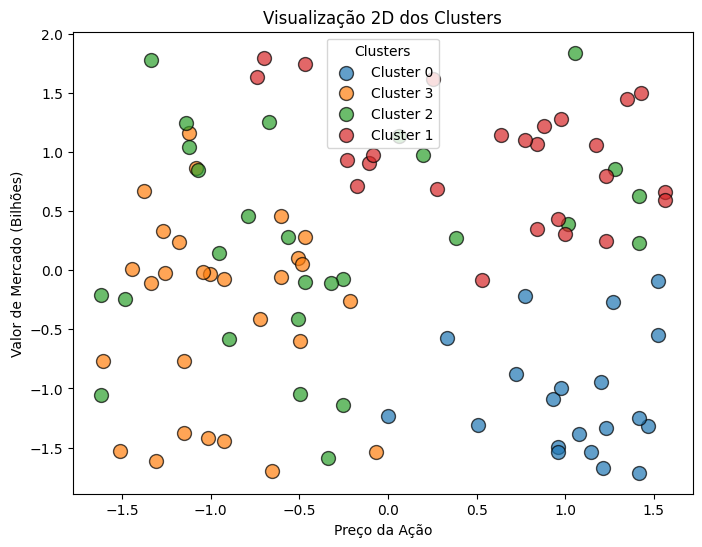

In [59]:
# a) Visualização 2D dos clusters formados
plt.figure(figsize=(8, 6))

# Atribuindo cores aos clusters
for i, cluster in enumerate(dados_normalizados['Cluster_4'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_4'] == cluster]
    
    # Gerando uma cor para cada cluster com plt.cm.tab10
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


In [60]:
from sklearn.cluster import KMeans

# Selecionando as variáveis para o clustering
X = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Aplicando KMeans com n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=42)
dados['Cluster_4'] = kmeans.fit_predict(X)

# Exibindo os dados com a coluna de clusters
print(dados.head())


   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  Cluster_4  
0             True      

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


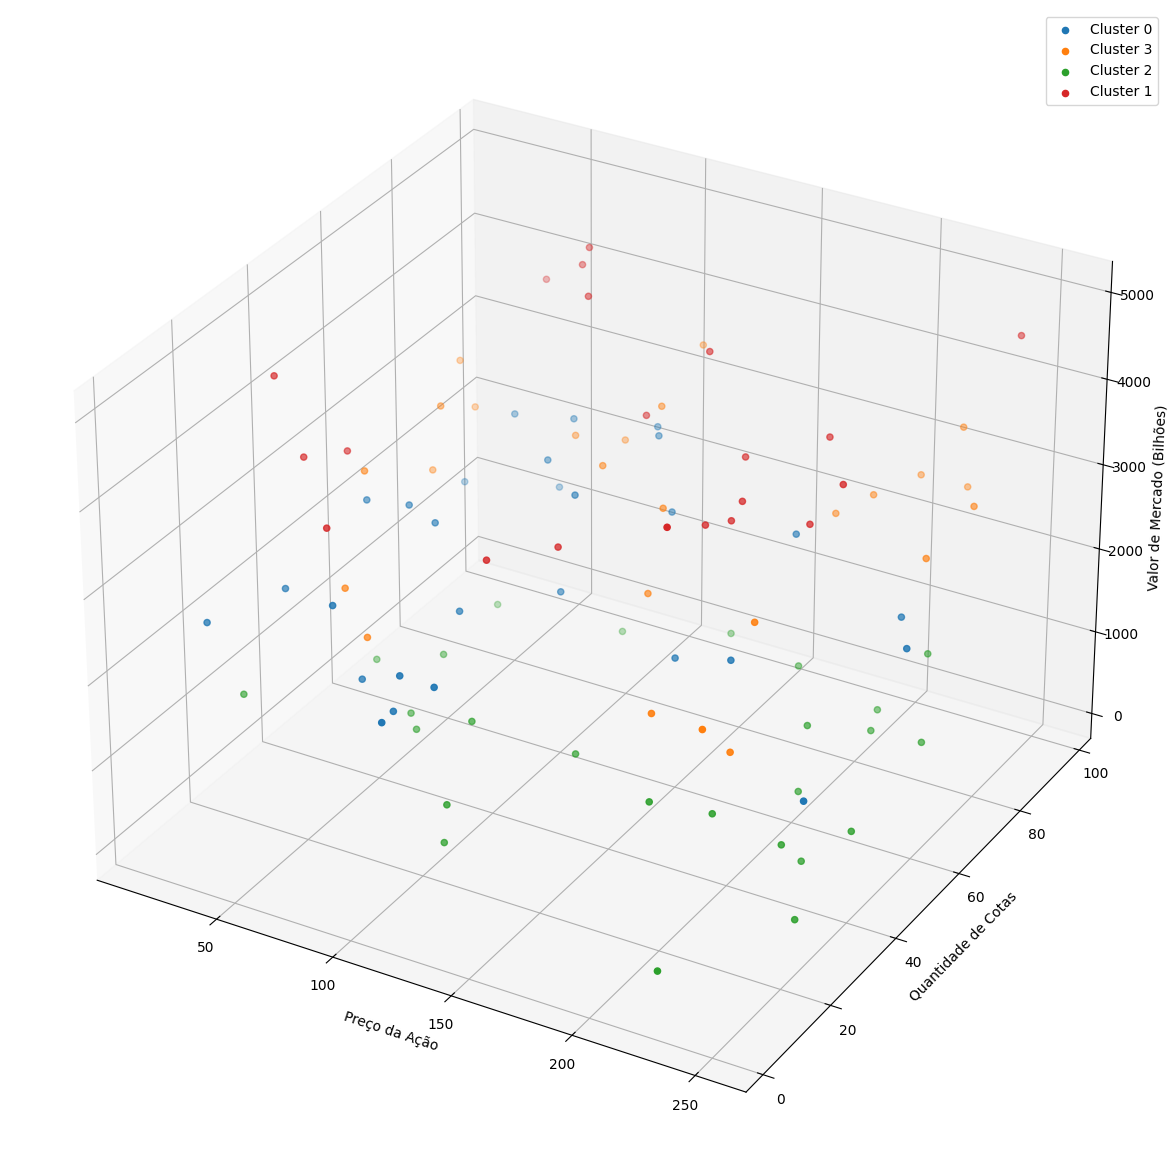

In [61]:
# b) Visualização 3D dos clusters formados
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Obtendo os clusters únicos
clusters = dados['Cluster_4'].unique()

# Iterando e plotando os clusters com cores distintas
for i, cluster in enumerate(clusters):
    cluster_data = dados[dados['Cluster_4'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], 
               cluster_data['qtde cotas'],
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10))  

# Títulos e rótulos
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')

# Legenda
plt.legend()

# Exibindo o gráfico
plt.show()
